# How to use an Asynchronous Lichess Python Client

This package uses `asyncio` and `aiohttp` libraries to make REST API calls to lichess.org API.

## What do you need to start using me?

First of all, you need to create your `personel access token`. Go to `https://lichess.org/account/oauth/token` and create one with access privilages what you need. Take in mind that each privilage maps one to one with some API endpoints, so to be able to use all of the endpoints you need to turn on all privilages.

![Lichess Token Creation](imgs/lichess_token_creation.png)

In [1]:
token = "VPFeuUb9tDZwPUQO"

## Initialize API Client

In [2]:
from lichess_client import APIClient

client = APIClient(token=token)

## How to access an endpoint?
As this client is written to handle asynchronous calls, you need to `await` each of the API call.

In [10]:
response = await client.account.get_my_email_address()
response

{'metadata': {'method': <RequestMethods.GET: 'GET'>, 'url': 'https://lichess.org/api/account/email', 'content_type': 'application/json', 'timestamp': b'Sat, 14 Mar 2020 08:47:05 GMT'}, 'entity': {'code': 200, 'reason': 'OK', 'status': <StatusTypes.SUCCESS: 'success'>, 'content': {'email': 'amcia94@gmail.com'}}}

## Manipulate the Response object
`Response` object is written in a way to help a user better laverage a programatic way to access returned information.

Access to API endpoint url:

In [12]:
response.metadata.url

'https://lichess.org/api/account/email'

Convert `Response` object to dictionary:

In [15]:
response.to_dict()

{'metadata': {'method': <RequestMethods.GET: 'GET'>,
  'url': 'https://lichess.org/api/account/email',
  'content_type': 'application/json',
  'timestamp': b'Sat, 14 Mar 2020 08:47:05 GMT'},
 'entity': {'code': 200,
  'reason': 'OK',
  'status': <StatusTypes.SUCCESS: 'success'>,
  'content': {'email': 'amcia94@gmail.com'}}}

Convert a metadata part of the `Response` object to dictionary:

In [14]:
response.metadata.to_dict()

{'method': <RequestMethods.GET: 'GET'>,
 'url': 'https://lichess.org/api/account/email',
 'content_type': 'application/json',
 'timestamp': b'Sat, 14 Mar 2020 08:47:05 GMT'}

Access to response HTTP code:

In [16]:
response.entity.code

200

The status is embedded as an enum object, all enums are under `lichess_client.utils.enums`

In [19]:
response.entity.status

<StatusTypes.SUCCESS: 'success'>

In [20]:
response.entity.status.value

'success'

Content access:

In [22]:
response.entity.content

{'email': 'amcia94@gmail.com'}

# Endpoints

## Account

In [26]:
response = await client.account.get_my_profile()
response.entity.content

{'id': 'amasend',
 'username': 'amasend',
 'online': True,
 'perfs': {'blitz': {'games': 1,
   'rating': 1339,
   'rd': 249,
   'prog': 0,
   'prov': True},
  'puzzle': {'games': 18, 'rating': 1779, 'rd': 108, 'prog': -85},
  'bullet': {'games': 0, 'rating': 1500, 'rd': 350, 'prog': 0, 'prov': True},
  'correspondence': {'games': 0,
   'rating': 1500,
   'rd': 350,
   'prog': 0,
   'prov': True},
  'classical': {'games': 1,
   'rating': 1323,
   'rd': 248,
   'prog': 0,
   'prov': True},
  'rapid': {'games': 31, 'rating': 1143, 'rd': 65, 'prog': -9}},
 'createdAt': 1581360617163,
 'seenAt': 1584175311174,
 'playTime': {'total': 27980, 'tv': 0},
 'language': 'en-US',
 'url': 'https://lichess.org/@/amasend',
 'nbFollowing': 0,
 'nbFollowers': 0,
 'count': {'all': 38,
  'rated': 33,
  'ai': 5,
  'draw': 3,
  'drawH': 3,
  'loss': 23,
  'lossH': 19,
  'win': 12,
  'winH': 11,
  'bookmark': 0,
  'playing': 0,
  'import': 0,
  'me': 0},
 'followable': True,
 'following': False,
 'blocking': 

In [28]:
response = await client.account.get_my_email_address()
response.entity.content

{'email': 'amcia94@gmail.com'}

In [29]:
response = await client.account.get_my_preferences()
response.entity.content

{'prefs': {'dark': True,
  'transp': False,
  'bgImg': '//lichess1.org/assets/images/background/landscape.jpg',
  'is3d': False,
  'theme': 'brown',
  'pieceSet': 'cburnett',
  'theme3d': 'Woodi',
  'pieceSet3d': 'Basic',
  'soundSet': 'standard',
  'blindfold': 0,
  'autoQueen': 2,
  'autoThreefold': 2,
  'takeback': 3,
  'moretime': 3,
  'clockTenths': 1,
  'clockBar': True,
  'clockSound': True,
  'premove': True,
  'animation': 2,
  'captured': True,
  'follow': True,
  'highlight': True,
  'destination': True,
  'coords': 1,
  'replay': 2,
  'challenge': 4,
  'message': 3,
  'coordColor': 2,
  'submitMove': 4,
  'confirmResign': 1,
  'insightShare': 1,
  'keyboardMove': 0,
  'zen': 0,
  'moveEvent': 2}}

In [37]:
response = await client.account.get_my_kid_mode_status()
f"Current kid mode status: {response.entity.content}"

"Current kid mode status: {'kid': False}"

In [38]:
response = await client.account.set_my_kid_mode_status(turned_on=True)
f"Setting kid mode: {response.entity.content}"

"Setting kid mode: {'ok': True}"

In [39]:
response = await client.account.get_my_kid_mode_status()
f"Checking kid mode status: {response.entity.content}"

"Checking kid mode status: {'kid': True}"

In [40]:
response = await client.account.set_my_kid_mode_status(turned_on=False)
f"Unsetting kid mode: {response.entity.content}"

"Unsetting kid mode: {'ok': True}"

In [41]:
response = await client.account.get_my_kid_mode_status()
f"Checking kid mode status {response.entity.content}"

"Checking kid mode status {'kid': False}"

## Users

In [43]:
response = await client.users.get_all_top_10()
response.entity.content

{'bullet': [{'id': 'zhigalko_sergei',
   'username': 'Zhigalko_Sergei',
   'perfs': {'bullet': {'rating': 3147, 'progress': 17}},
   'title': 'GM',
   'patron': True,
   'online': True},
  {'id': 'alireza2003',
   'username': 'alireza2003',
   'perfs': {'bullet': {'rating': 3145, 'progress': 26}},
   'title': 'GM'},
  {'id': 'jasugi99',
   'username': 'Jasugi99',
   'perfs': {'bullet': {'rating': 3055, 'progress': 16}},
   'title': 'NM'},
  {'id': 'penguingim1',
   'username': 'penguingim1',
   'perfs': {'bullet': {'rating': 3032, 'progress': -14}},
   'title': 'GM',
   'patron': True},
  {'id': 'watneg',
   'username': 'Watneg',
   'perfs': {'bullet': {'rating': 3024, 'progress': 23}},
   'title': 'GM'},
  {'id': 'drnykterstein',
   'username': 'DrNykterstein',
   'perfs': {'bullet': {'rating': 3021, 'progress': -6}},
   'title': 'GM',
   'patron': True},
  {'id': 'muisback',
   'username': 'muisback',
   'perfs': {'bullet': {'rating': 3001, 'progress': -4}},
   'title': 'GM'},
  {'id

In [44]:
response = await client.users.get_live_streamers()
response.entity.content

[{'name': 'grandmastergauri',
  'title': 'FM',
  'id': 'grandmastergauri',
  'playing': True},
 {'name': 'wannabe2700', 'title': 'IM', 'id': 'wannabe2700'},
 {'name': 'knightoffrozenlake', 'id': 'knightoffrozenlake'}]

In [47]:
response = await client.users.get_members_of_a_team(team_id="team")
response.entity.content

[{'id': 'staskamaev',
  'username': 'staskamaev',
  'online': False,
  'perfs': {'chess960': {'games': 341, 'rating': 1818, 'rd': 55, 'prog': 17},
   'antichess': {'games': 226, 'rating': 1711, 'rd': 99, 'prog': 15},
   'atomic': {'games': 2813, 'rating': 2205, 'rd': 48, 'prog': 0},
   'racingKings': {'games': 119, 'rating': 1872, 'rd': 51, 'prog': 15},
   'ultraBullet': {'games': 505, 'rating': 1696, 'rd': 72, 'prog': -4},
   'blitz': {'games': 1210, 'rating': 2165, 'rd': 50, 'prog': 27},
   'kingOfTheHill': {'games': 87, 'rating': 1713, 'rd': 83, 'prog': 122},
   'crazyhouse': {'games': 1285, 'rating': 2015, 'rd': 45, 'prog': -10},
   'threeCheck': {'games': 227, 'rating': 1861, 'rd': 52, 'prog': 7},
   'bullet': {'games': 1886, 'rating': 2139, 'rd': 58, 'prog': 13},
   'correspondence': {'games': 71,
    'rating': 1729,
    'rd': 122,
    'prog': -19,
    'prov': True},
   'horde': {'games': 52, 'rating': 1678, 'rd': 106, 'prog': -14},
   'puzzle': {'games': 1499, 'rating': 1847, 'r

In [49]:
from lichess_client.utils.enums import VariantTypes

response = await client.users.get_one_leaderboard(variant=VariantTypes.ATOMIC)
response.entity.content

{'users': [{'id': 'xeransis',
   'username': 'Xeransis',
   'perfs': {'atomic': {'rating': 2498, 'progress': 9}}},
  {'id': 'fast-tsunami',
   'username': 'fast-tsunami',
   'perfs': {'atomic': {'rating': 2486, 'progress': 3}},
   'title': 'LM'},
  {'id': 'grandlapin',
   'username': 'GrandLapin',
   'perfs': {'atomic': {'rating': 2471, 'progress': -2}}},
  {'id': 'sutcunuri',
   'username': 'sutcunuri',
   'perfs': {'atomic': {'rating': 2470, 'progress': 27}},
   'title': 'CM',
   'online': True},
  {'id': 'neutrone',
   'username': 'neutrone',
   'perfs': {'atomic': {'rating': 2429, 'progress': 31}}},
  {'id': 'pashpash',
   'username': 'pashpash',
   'perfs': {'atomic': {'rating': 2406, 'progress': 33}},
   'title': 'NM'},
  {'id': 'brigt_sun',
   'username': 'Brigt_Sun',
   'perfs': {'atomic': {'rating': 2370, 'progress': -6}}},
  {'id': 'jeffritz',
   'username': 'Jeffritz',
   'perfs': {'atomic': {'rating': 2361, 'progress': 7}}},
  {'id': 'kreedz',
   'username': 'kreedz',
   'p

In [50]:
response = await client.users.get_rating_history_of_a_user(username="amasend")
response.entity.content

[{'name': 'Bullet', 'points': []},
 {'name': 'Blitz', 'points': [[2020, 1, 12, 1339]]},
 {'name': 'Rapid',
  'points': [[2020, 1, 12, 1344],
   [2020, 1, 14, 1241],
   [2020, 1, 15, 1133],
   [2020, 1, 16, 1182],
   [2020, 1, 19, 1223],
   [2020, 1, 20, 1177],
   [2020, 1, 21, 1184],
   [2020, 1, 22, 1159],
   [2020, 1, 23, 1156],
   [2020, 1, 24, 1133],
   [2020, 2, 1, 1114],
   [2020, 2, 2, 1154],
   [2020, 2, 3, 1122],
   [2020, 2, 4, 1139],
   [2020, 2, 5, 1168],
   [2020, 2, 7, 1154],
   [2020, 2, 8, 1142],
   [2020, 2, 9, 1155],
   [2020, 2, 13, 1143]]},
 {'name': 'Classical', 'points': [[2020, 2, 7, 1323]]},
 {'name': 'Correspondence', 'points': []},
 {'name': 'Chess960', 'points': []},
 {'name': 'King of the Hill', 'points': []},
 {'name': 'Three-check', 'points': []},
 {'name': 'Antichess', 'points': []},
 {'name': 'Atomic', 'points': []},
 {'name': 'Horde', 'points': []},
 {'name': 'Racing Kings', 'points': []},
 {'name': 'Crazyhouse', 'points': []},
 {'name': 'Puzzles', 'poi

In [52]:
response = await client.users.get_real_time_users_status(users_ids=['amasend', 'kkoutras'])
response.entity.content

[{'name': 'amasend', 'id': 'amasend', 'online': True},
 {'name': 'kkoutras', 'id': 'kkoutras', 'online': True, 'playing': True}]

In [53]:
response = await client.users.get_user_activity(username="amasend")
response.entity.content

[{'interval': {'start': 1584057600000, 'end': 1584144000000},
  'games': {'rapid': {'win': 0,
    'loss': 1,
    'draw': 0,
    'rp': {'before': 1155, 'after': 1143}}},
  'studies': [{'id': '0s2LlkIX', 'name': 'Test broadcast'},
   {'id': '89tq13d7', 'name': 'Test broadcast'},
   {'id': '8K8zfrw0', 'name': 'Test broadcast'},
   {'id': 'JBRqosSs', 'name': 'Test broadcast'},
   {'id': 'LzWIT06N', 'name': 'Test broadcast'},
   {'id': 'PygBQmRy', 'name': 'Test broadcast'},
   {'id': 'WpYvbdpZ', 'name': 'Test broadcast'},
   {'id': 'c1agIWrz', 'name': 'Test broadcast'},
   {'id': 'dnZP4GSg', 'name': 'Test broadcast'},
   {'id': 'ggOrBzFY', 'name': 'Test broadcast'},
   {'id': 'gueCtDva', 'name': 'Test broadcast'},
   {'id': 'rBwvuw5w', 'name': 'Test broadcast'},
   {'id': 'wYjm1fni', 'name': 'Test broadcast'},
   {'id': 'yfDH4cZV', 'name': 'Test broadcast'},
   {'id': 'zd99KE1J', 'name': 'Test broadcast'}]},
 {'interval': {'start': 1583971200000, 'end': 1584057600000},
  'studies': [{'id': 

In [54]:
response = await client.users.get_user_public_data(username="amasend")
response.entity.content

{'id': 'amasend',
 'username': 'amasend',
 'online': True,
 'perfs': {'blitz': {'games': 1,
   'rating': 1339,
   'rd': 249,
   'prog': 0,
   'prov': True},
  'puzzle': {'games': 18, 'rating': 1779, 'rd': 108, 'prog': -85},
  'bullet': {'games': 0, 'rating': 1500, 'rd': 350, 'prog': 0, 'prov': True},
  'correspondence': {'games': 0,
   'rating': 1500,
   'rd': 350,
   'prog': 0,
   'prov': True},
  'classical': {'games': 1,
   'rating': 1323,
   'rd': 248,
   'prog': 0,
   'prov': True},
  'rapid': {'games': 31, 'rating': 1143, 'rd': 65, 'prog': -9}},
 'createdAt': 1581360617163,
 'seenAt': 1584177212724,
 'playTime': {'total': 27980, 'tv': 0},
 'language': 'en-US',
 'url': 'https://lichess.org/@/amasend',
 'nbFollowing': 0,
 'nbFollowers': 0,
 'count': {'all': 38,
  'rated': 33,
  'ai': 5,
  'draw': 3,
  'drawH': 3,
  'loss': 23,
  'lossH': 19,
  'win': 12,
  'winH': 11,
  'bookmark': 0,
  'playing': 0,
  'import': 0,
  'me': 0}}

In [55]:
response = await client.users.get_users_by_id(users_ids=['amasend', 'kkoutras'])
response.entity.content

[{'id': 'amasend',
  'username': 'amasend',
  'online': True,
  'perfs': {'blitz': {'games': 1,
    'rating': 1339,
    'rd': 249,
    'prog': 0,
    'prov': True},
   'puzzle': {'games': 18, 'rating': 1779, 'rd': 108, 'prog': -85},
   'bullet': {'games': 0, 'rating': 1500, 'rd': 350, 'prog': 0, 'prov': True},
   'correspondence': {'games': 0,
    'rating': 1500,
    'rd': 350,
    'prog': 0,
    'prov': True},
   'classical': {'games': 1,
    'rating': 1323,
    'rd': 248,
    'prog': 0,
    'prov': True},
   'rapid': {'games': 31, 'rating': 1143, 'rd': 65, 'prog': -9}},
  'createdAt': 1581360617163,
  'seenAt': 1584177212724,
  'playTime': {'total': 27980, 'tv': 0},
  'language': 'en-US'},
 {'id': 'kkoutras',
  'username': 'kkoutras',
  'online': True,
  'perfs': {'chess960': {'games': 4,
    'rating': 1351,
    'rd': 246,
    'prog': 0,
    'prov': True},
   'antichess': {'games': 45,
    'rating': 1458,
    'rd': 121,
    'prog': 28,
    'prov': True},
   'atomic': {'games': 101,
 

In [56]:
response = await client.users.get_your_puzzle_activity()
response.entity.content

[{'id': 61090,
  'date': 1581858320340,
  'rating': 1809,
  'ratingDiff': -30,
  'puzzleRating': 1673},
 {'id': 61089,
  'date': 1581858301312,
  'rating': 1795,
  'ratingDiff': 14,
  'puzzleRating': 1532},
 {'id': 61088,
  'date': 1581858254531,
  'rating': 1825,
  'ratingDiff': -30,
  'puzzleRating': 1605},
 {'id': 61086,
  'date': 1581858071512,
  'rating': 1855,
  'ratingDiff': -30,
  'puzzleRating': 1802},
 {'id': 61084,
  'date': 1581858036607,
  'rating': 1846,
  'ratingDiff': 9,
  'puzzleRating': 1572},
 {'id': 61081,
  'date': 1581858012990,
  'rating': 1834,
  'ratingDiff': 12,
  'puzzleRating': 1483},
 {'id': 61078,
  'date': 1581804723934,
  'rating': 1864,
  'ratingDiff': -30,
  'puzzleRating': 1692},
 {'id': 61075,
  'date': 1581804698258,
  'rating': 1894,
  'ratingDiff': -30,
  'puzzleRating': 1433},
 {'id': 61071,
  'date': 1581804596184,
  'rating': 1924,
  'ratingDiff': -30,
  'puzzleRating': 1678},
 {'id': 61070,
  'date': 1581804530321,
  'rating': 1954,
  'ratingD

## Relations

In [59]:
response = await client.relations.get_users_followed_by_a_user(username="grandmastergauri")
response.entity.content

[{'id': 'iamben',
  'username': 'iamben',
  'online': False,
  'perfs': {'blitz': {'games': 122, 'rating': 825, 'rd': 76, 'prog': -19},
   'puzzle': {'games': 13,
    'rating': 1558,
    'rd': 116,
    'prog': -43,
    'prov': True},
   'bullet': {'games': 206, 'rating': 1082, 'rd': 77, 'prog': 17},
   'correspondence': {'games': 0,
    'rating': 1500,
    'rd': 350,
    'prog': 0,
    'prov': True},
   'classical': {'games': 8,
    'rating': 1300,
    'rd': 132,
    'prog': 0,
    'prov': True},
   'rapid': {'games': 17, 'rating': 1045, 'rd': 103, 'prog': -77}},
  'createdAt': 1570516361127,
  'engine': True,
  'seenAt': 1571463654780,
  'playTime': {'total': 100792, 'tv': 0},
  'url': 'https://lichess.org/@/iamben'},
 {'id': 'cybelletw',
  'username': 'cybelletw',
  'online': False,
  'perfs': {'blitz': {'games': 8,
    'rating': 1360,
    'rd': 127,
    'prog': 0,
    'prov': True},
   'bullet': {'games': 8, 'rating': 1222, 'rd': 129, 'prog': 0, 'prov': True},
   'correspondence': {

In [6]:
response = await client.relations.get_users_who_follow_a_user(username="grandmastergauri")
response.entity.content[0]

{'id': 'dhairyaxbts',
 'username': 'DhairyaxBTS',
 'online': False,
 'perfs': {'chess960': {'games': 3,
   'rating': 1557,
   'rd': 195,
   'prog': 0,
   'prov': True},
  'blitz': {'games': 733, 'rating': 1552, 'rd': 47, 'prog': -1},
  'puzzle': {'games': 2037, 'rating': 1937, 'rd': 63, 'prog': 77},
  'ultraBullet': {'games': 1,
   'rating': 1605,
   'rd': 279,
   'prog': 0,
   'prov': True},
  'bullet': {'games': 3439, 'rating': 1745, 'rd': 45, 'prog': 4},
  'correspondence': {'games': 7,
   'rating': 1602,
   'rd': 170,
   'prog': 0,
   'prov': True},
  'classical': {'games': 12,
   'rating': 1608,
   'rd': 126,
   'prog': 33,
   'prov': True},
  'rapid': {'games': 135, 'rating': 1296, 'rd': 94, 'prog': -1}},
 'createdAt': 1545085472935,
 'profile': {'country': 'US'},
 'seenAt': 1584161983000,
 'playTime': {'total': 1018199, 'tv': 3580},
 'language': 'en-US',
 'url': 'https://lichess.org/@/DhairyaxBTS'}

## Games

In [8]:
response = await client.games.export_games_by_ids(game_ids=['TJxUmbWK', 'ILwozzRZ'])
response.entity.content

[<Game at 0x7ff51be1a198 ('arex' vs. 'JERC-12Jesus', '2017.08.30')>,
 <Game at 0x7ff52072b7f0 ('Roven1976' vs. 'arex', '2017.08.30')>]

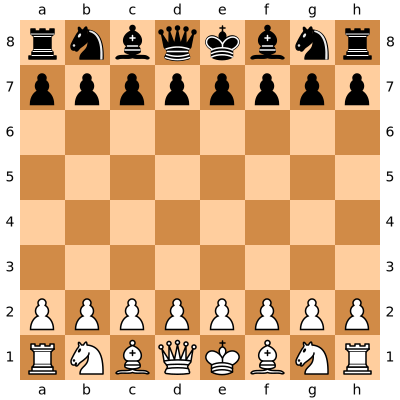

In [13]:
response.entity.content[0].board()

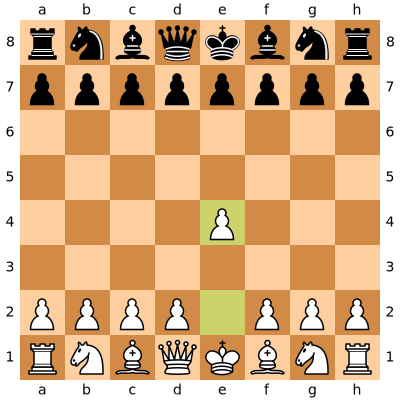

In [29]:
response.entity.content[0].variation(0).board()

In [30]:
response = await client.games.export_games_of_a_user(username="amasend")
response.entity.content

[<Game at 0x7ff51ab5fc50 ('lichess AI level 1' vs. 'amasend', '2020.03.08')>,
 <Game at 0x7ff51aaaa4e0 ('amasend' vs. 'lichess AI level 1', '2020.03.08')>,
 <Game at 0x7ff51a8fde80 ('amasend' vs. 'lichess AI level 5', '2020.02.13')>,
 <Game at 0x7ff51aae3828 ('amasend' vs. 'lichess AI level 5', '2020.02.13')>,
 <Game at 0x7ff51aa97b38 ('lichess AI level 5' vs. 'amasend', '2020.02.13')>]

In [31]:
response = await client.games.export_one_game(game_id="TJxUmbWK")
response.entity.content

<Game at 0x7ff51aa97668 ('arex' vs. 'JERC-12Jesus', '2017.08.30')>

In [32]:
response = await client.games.get_current_tv_games()
response.entity.content

{'Bot': {'user': {'name': 'GodelEscherBot',
   'title': 'BOT',
   'id': 'godelescherbot'},
  'rating': 2392,
  'gameId': 'VhSc8NUN'},
 'UltraBullet': {'user': {'name': 'HouseMartell',
   'title': 'FM',
   'id': 'housemartell'},
  'rating': 2298,
  'gameId': 'Ce30auwC'},
 'Bullet': {'user': {'name': 'NguyenXi1427', 'id': 'nguyenxi1427'},
  'rating': 2789,
  'gameId': '2PUeL8OO'},
 'Antichess': {'user': {'name': 'AlekseyGuru', 'id': 'alekseyguru'},
  'rating': 2281,
  'gameId': 'L9BQy47h'},
 'Computer': {'user': {'name': 'imran23', 'id': 'imran23'},
  'rating': 2356,
  'gameId': 'XOp1Q5Bm'},
 'Horde': {'user': {'name': 'kapital2010', 'id': 'kapital2010'},
  'rating': 1862,
  'gameId': 'kJZQYBK3'},
 'Rapid': {'user': {'name': 'zugzwang54', 'id': 'zugzwang54'},
  'rating': 2145,
  'gameId': 'yxv74pNa'},
 'Atomic': {'user': {'name': 'GermanChamp', 'id': 'germanchamp'},
  'rating': 2106,
  'gameId': 'DPnNkJ4K'},
 'Crazyhouse': {'user': {'name': 'ASKCHESS', 'id': 'askchess'},
  'rating': 2004

In [33]:
response = await client.games.get_ongoing_games()
response.entity.content

{'nowPlaying': []}

In [36]:
response = await client.games.stream_current_games(users=['amasend', 'lovlas', 'chess-network'])
response.entity.content

NotImplementedError: This method is not implemented yet.

## Teams

In [37]:
response = await client.teams.get_members_of_a_team()
response.entity.content

NotImplementedError: Please use client.users.get_members_of_a_team(...)

In [46]:
response = await client.teams.join_a_team(team_id="myteamamasend")
response.entity.content

{'error': 'Team not found'}

In [42]:
response = await client.teams.kick_a_user_from_your_team(user_id="amasend", team_id="myteamamasend")
response.entity.content

'error'

In [43]:
response = await client.teams.leave_a_team(team_id="myteamamasend")
response.entity.content

{'ok': True}